Try to extract bottleneck features to illustrate how CNN works

In [88]:
import os
import sys
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras import callbacks
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras import backend as K
import tensorflow as tf
import numpy as np
import scipy.io as sio
import time
from keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import Model

In [92]:
model_path = 'D:/2019/4DSTEM/CNN/Models/Regression/FullTraining/Dense_layer_size/sz512/'
# Load model:
model = load_model(model_path + 'FinalModel.h5')

In [95]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 157, 157, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 157, 157, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 78, 78, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 78, 78, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 78, 78, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 39, 39, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 39, 39, 256)     

In [96]:
# Remove top fully connected layer
model.pop()
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 157, 157, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 157, 157, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 78, 78, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 78, 78, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 78, 78, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 39, 39, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 39, 39, 256)     

C:\Users\Chenyu\Anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


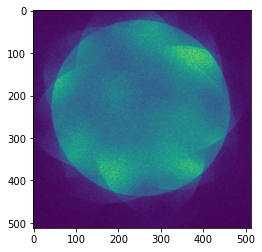

In [17]:
data_path = 'D:/2019/4DSTEM/CNN/Exp_PACBED/071618_S9/'
data = sio.loadmat(data_path + 'SrPACBED_Stack_R4.mat')
data = data['PACBED_stack']
plt.imshow(data[:,:,10])

In [58]:
truth = np.load(data_path + 'SrPeaks_thickness.npy')
print(truth.shape)
print(data.shape)

(33, 1)
(512, 512, 33)


In [126]:
x_train_list = []
y_train_list = []
for i in range(data.shape[2]):
    img = data[:,:,i].astype('float')
    img = scale_range(img,0,1)
    img = img.astype(dtype=np.float32)
    img = Image.fromarray(img).resize(size=(157,157))
    img = np.asarray(img)
    img_size = img.shape[0]
    sx, sy = img.shape[0], img.shape[1]
    new_channel = np.zeros((img_size, img_size))
    img_stack = np.dstack((img, new_channel, new_channel))
    x_train_list.append(img_stack)
    y_train_list.append(truth[i])
x_train = np.concatenate([arr[np.newaxis] for arr in x_train_list])
#y_train = to_categorical(y_train_list, num_classes=nb_class)
y_train = np.asarray(y_train_list,dtype=np.float32)

In [127]:
x_train.shape

(33, 157, 157, 3)

In [128]:
datagen = ImageDataGenerator(
        featurewise_center=True)

datagen = ImageDataGenerator(
    featurewise_center=True,
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=1,
    vertical_flip=1,
    shear_range=0.05)

datagen.fit(x_train)
generator = datagen.flow(
    x_train,
    y_train,
    batch_size=27,
    shuffle=False,
    save_to_dir=None,
    save_prefix="",
    save_format="png",)
print('made it past generator')

# bottleneck_features_train = model.predict_generator(
#     generator)

made it past generator


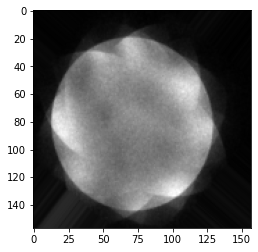

In [139]:
x,y = generator.next()
for i in range(0,1):
    image = x[i]
    plt.imshow(image[:,:,0],cmap='gray')
    plt.show()

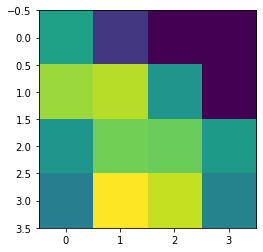

In [137]:
plt.imshow(bottleneck_features_train[10,:,:,150])

In [133]:
def scale_range (input, min, max):
    input += -(np.min(input))
    input /= np.max(input) / (max - min)
    input += min
    return input    